In [4]:
from unittest.mock import inplace

import pandas as pd
import numpy as np
import statsmodels.api as sm
from dask.array import square
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
np.random.seed(42) # For reproducibility
n_samples = 500

data = pd.DataFrame({
    'Popliteal_Height': np.random.normal(42, 3, n_samples),  # Mean 42cm, SD 3cm
    'Buttock_Popliteal_Length': np.random.normal(45, 4, n_samples),
    'Elbow_Rest_Height': np.random.normal(22, 2, n_samples),
    'Seat_Height': np.random.normal(43, 5, n_samples), # Furniture is one-size-fits-all
    'Seat_Depth': np.random.normal(38, 5, n_samples),
    'Desk_Height': np.random.normal(70, 5, n_samples),
})

In [16]:
df = pd.read_excel(r"C:\Users\THINKBOOK\Downloads\separated_records.xlsx",skiprows=1)

In [19]:
males_df = df.loc[0:85]
males_df.head()

,ID,Age,Gender,Weight (kg),Height(cm),Shoulder Height (SH),Subscapular Height (SSH),Elbow Height (EH),Pop Height,Popliteal Height (PH),...,TableHeight,Unnamed: 18,UEB_max,SeatHeight_min,SeatDepth.1,SeatWidth.1,SeatTableClearance,TableHeight.1,SeatHeight,UEB
0,Participant 1,20,M,69.3,182.0,60.2,40.6,17.1,70.1,50.1,...,93.5,NaN,35.9,64.7,MA,High MS,MA,Low MS,MA,MA
1,Participant 2,23,M,67.0,175.5,56.5,42.9,16.4,68.2,48.2,...,NaN,NaN,NaN,NaN,MA,High MS,MA,Low MS,MA,MA
2,Participant 3,24,M,114.2,181.1,72.0,49.6,28.3,70.3,50.3,...,NaN,NaN,NaN,NaN,MA,Low MS,MA,Low MS,MA,MA
3,Participant 6,20,M,65.9,161.0,54.5,41.3,16.5,65.5,45.5,...,NaN,NaN,NaN,NaN,High MS,MA,MA,Low MS,MA,MA
4,Particippant 8,18,M,65.3,176.3,59.0,44.0,19.4,72.2,52.2,...,NaN,NaN,NaN,NaN,MA,High MS,MA,Low MS,MA,MA


In [23]:
males_df.fillna(value=0, inplace=True)

In [39]:

males_df.rename(columns ={"Buttock-Popliteal Length (BPL)" : "Buttock_Popliteal_Length", "Popliteal Height (PH)" : "Popliteal_Height"}, inplace=True)
males_df
# males_df['SeatHeight_min'].head()

,ID,Age,Gender,Weight (kg),Height(cm),Shoulder Height (SH),Subscapular Height (SSH),Elbow Height (EH),Pop Height,Popliteal_Height,...,Unnamed: 18,UEB_max,SeatHeight_min,SeatDepth.1,SeatWidth.1,SeatTableClearance,TableHeight.1,SeatHeight,UEB,SH_PH_Ratio
0,Participant 1,20,M,69.3,182.0,60.2,40.6,17.1,70.1,50.1,...,0.0,35.9,64.7,MA,High MS,MA,Low MS,MA,MA,1.487693
1,Participant 2,23,M,67.0,175.5,56.5,42.9,16.4,68.2,48.2,...,0.0,0.0,0.0,MA,High MS,MA,Low MS,MA,MA,0.000000
2,Participant 3,24,M,114.2,181.1,72.0,49.6,28.3,70.3,50.3,...,0.0,0.0,0.0,MA,Low MS,MA,Low MS,MA,MA,0.000000
3,Participant 6,20,M,65.9,161.0,54.5,41.3,16.5,65.5,45.5,...,0.0,0.0,0.0,High MS,MA,MA,Low MS,MA,MA,0.000000
4,Particippant 8,18,M,65.3,176.3,59.0,44.0,19.4,72.2,52.2,...,0.0,0.0,0.0,MA,High MS,MA,Low MS,MA,MA,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Participant 112,18,M,71.3,176.0,59.3,43.8,15.9,67.6,47.6,...,0.0,0.0,0.0,High MS,High MS,MA,Low MS,MA,MA,0.000000
78,Participant 113,18,M,72.3,175.0,59.8,48.8,19.2,68.3,48.3,...,0.0,0.0,0.0,High MS,High MS,MA,Low MS,MA,MA,0.000000
79,Participant 114,19,M,93.8,176.8,63.1,51.7,20.0,66.6,46.6,...,0.0,0.0,0.0,High MS,MA,MA,Low MS,MA,MA,0.000000
80,Participant 118,19,M,70.4,166.4,64.9,46.7,23.7,66.3,46.3,...,0.0,0.0,0.0,High MS,High MS,MA,Low MS,MA,MA,0.000000


In [59]:
print(males_df['SeatHeight_min'].iloc[0])
males_df['SeatDepth'].iloc[0]

64.7


np.float64(44.9)

In [37]:
# 2. Calculate Mismatch Ratios/Differences (Feature Engineering)
data['SH_PH_Ratio'] = data['SeatHeight_min'].iloc[0] / data['Popliteal_Height']
data['SD_BPL_Ratio'] = data['SeatDepth'] / data['Buttock_Popliteal_Length']
# data['DH_ERH_Diff'] = data['Desk_Height'] - data['Elbow_Rest_Height']


KeyError: 'SeatHeight_min'

In [60]:
males_df['SH_PH_Ratio'] = males_df['SeatHeight_min'].iloc[0] / data['Popliteal_Height']
males_df['SD_BPL_Ratio'] = males_df['SeatDepth'].iloc[0] / males_df['Buttock_Popliteal_Length']
# males_df['DH_ERH_Diff'] = males_df['Desk_Height'] - males_df['Elbow_Rest_Height']


In [61]:
males_df["SH_PH_Ratio"]

0     1.487693
1     1.555842
2     1.472360
3     1.389334
4     1.566679
        ...   
77    1.574095
78    1.530445
79    1.795362
80    1.565033
81    1.502159
Name: SH_PH_Ratio, Length: 82, dtype: float64

In [62]:
# 3. Define the Binary Target Variable 'Suitable' (Y)
# Based on our earlier definition
males_df['Suitable_SH'] = (males_df['SeatHeight_min'] >= 0.9 * males_df['Popliteal_Height']) & (males_df['SeatHeight_min'] <= 1.1 * males_df['Popliteal_Height'])
males_df['Suitable_SD'] = (males_df['SeatDepth'] <= 0.8 * males_df['Buttock_Popliteal_Length'])
# males_df['Suitable_DH'] = (males_df['Desk_Height'] >= males_df['Elbow_Rest_Height'] - 2) & (males_df['Desk_Height'] <= males_df['Elbow_Rest_Height'] + 3)

In [63]:
males_df['Suitable'] = (males_df['Suitable_SH'] & males_df['Suitable_SD']).astype(int) # 1 if all True, else 0

In [64]:
males_df["Suitable"].tail()

77    0
78    0
79    0
80    0
81    0
Name: Suitable, dtype: int64

In [65]:
# 4. Prepare Data for Modeling
# Select our engineered features and the target
X = males_df[['SH_PH_Ratio', 'SD_BPL_Ratio']]
y = males_df['Suitable']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

In [66]:

# 5. Split the Data (Optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

    const  SH_PH_Ratio  SD_BPL_Ratio
62    1.0     1.672656      0.937370
56    1.0     1.638707      1.145408
40    1.0     1.463291      0.984649
9     1.0     1.483003      1.032184
78    1.0     1.530445      1.160207
    const  SH_PH_Ratio  SD_BPL_Ratio
30    1.0     1.609658      1.041763
0     1.0     1.487693      0.889109
22    1.0     1.533081      0.937370
31    1.0     1.360477      1.122500
18    1.0     1.647319      0.933472
62    0
56    0
40    0
9     0
78    0
Name: Suitable, dtype: int64
30    0
0     0
22    0
31    0
18    0
Name: Suitable, dtype: int64


In [68]:

# 6. Build and Train the Logit Model
model = sm.Logit(y_train, X_train)
result = model.fit()


         Current function value: 0.000000
         Iterations: 35


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\ProgramData\anaconda3

In [69]:
# 7. View Model Results
print(result.summary2())

                               Results: Logit
Model:                  Logit               Method:              MLE        
Dependent Variable:     Suitable            Pseudo R-squared:    inf        
Date:                   2025-10-03 16:24    AIC:                 6.0000     
No. Observations:       65                  BIC:                 12.5232    
Df Model:               2                   Log-Likelihood:      -2.9841e-09
Df Residuals:           62                  LL-Null:             0.0000     
Converged:              0.0000              LLR p-value:         1.0000     
No. Iterations:         35.0000             Scale:               1.0000     
----------------------------------------------------------------------------
              Coef.     Std.Err.      z    P>|z|      [0.025       0.975]   
----------------------------------------------------------------------------
const         70.7098 1356681.0873  0.0001 1.0000 -2658975.3599 2659116.7794
SH_PH_Ratio  -44.6927  668922.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\ProgramData\anaconda3

In [70]:
# 8. Interpret the Results
# Look at the p-values (P>|z|) to see which features are significant predictors.
# A coefficient (Coef.) for 'SH_PH_Ratio' of -5.0 would mean:
# "For every one-unit increase in the Seat-Height-to-Popliteal-Height ratio,
# the log-odds of the furniture being suitable decrease by 5."
# Since the ideal ratio is ~1, we'd expect values far from 1 to have negative coefficients.


In [72]:
# 9. Make Predictions on the Test Set (Evaluation)
# Get predicted probabilities
y_pred_proba = result.predict(X_test)
print(y_pred_proba.head())
# Convert probabilities to class predictions (using 0.5 as threshold)
y_pred = (y_pred_proba >= 0.5).astype(int)
print(y_pred.tail())

30    5.732374e-16
0     1.908878e-11
22    5.229659e-13
31    2.851380e-12
18    3.598827e-15
dtype: float64
68    0
35    0
69    0
45    0
75    0
dtype: int64


In [73]:
# 10. Evaluate Model Performance
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[17]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [74]:
print(y_test.head())

30    0
0     0
22    0
31    0
18    0
Name: Suitable, dtype: int64


In [1]:
import matplotlib.pyplot as plt


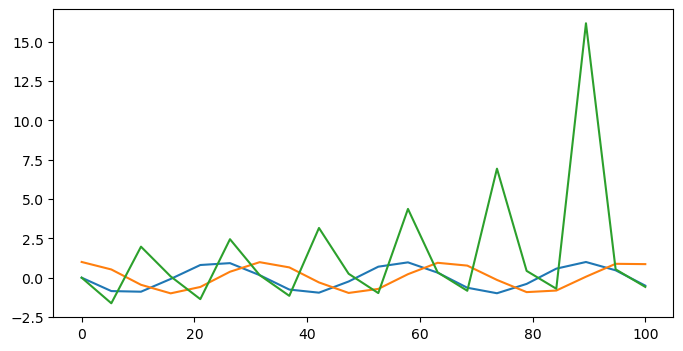

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
x1 = np.linspace(0, 100, 20)
x2 = np.linspace(0, 100, 20)
x3 = np.linspace(0, 100, 20)
y1 = np.sin(x1)
y2 = np.cos(x2)
y3 = np.tan(x3)
ax.plot(x1, y1, label='sin')
ax.plot(x2, y2, label='cos')
ax.plot(x3, y3, label='tan')

In [3]:
import pandas as pd
from scipy.stats import chi2_contingency

data = [[20, 30], [25, 25]]
df = pd.DataFrame(data, columns=["Like", "Dislike"], index=["Male", "Female"])
chi2, p, dof, expected = chi2_contingency(df)
print("chi:{}\n p:{}\n dof:{}\n expected:{}".format(chi2, p, dof, expected))

chi:0.6464646464646464
 p:0.4213795037428696
 dof:1
 expected:[[22.5 27.5]
 [22.5 27.5]]


In [11]:
print(0.2778+0.2778+0.2273+0.2273)

1.0102


4